In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('datasets/house_prices_dataset.csv')

data

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903
...,...,...,...,...,...
9995,2650.551032,7,9,18.126034,431344.267823
9996,1000.827516,2,53,24.479692,6650.271134
9997,1647.341638,5,80,2.189312,233698.384301
9998,2247.882787,6,73,27.931014,280766.827379


In [35]:
data.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


<Axes: xlabel='price'>

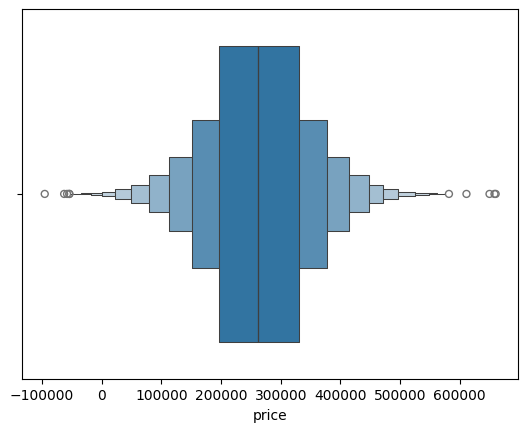

In [36]:
sns.boxenplot(x=data['price'])

In [37]:
data.isnull().count()

square_feet             10000
num_rooms               10000
age                     10000
distance_to_city(km)    10000
price                   10000
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [39]:
data.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


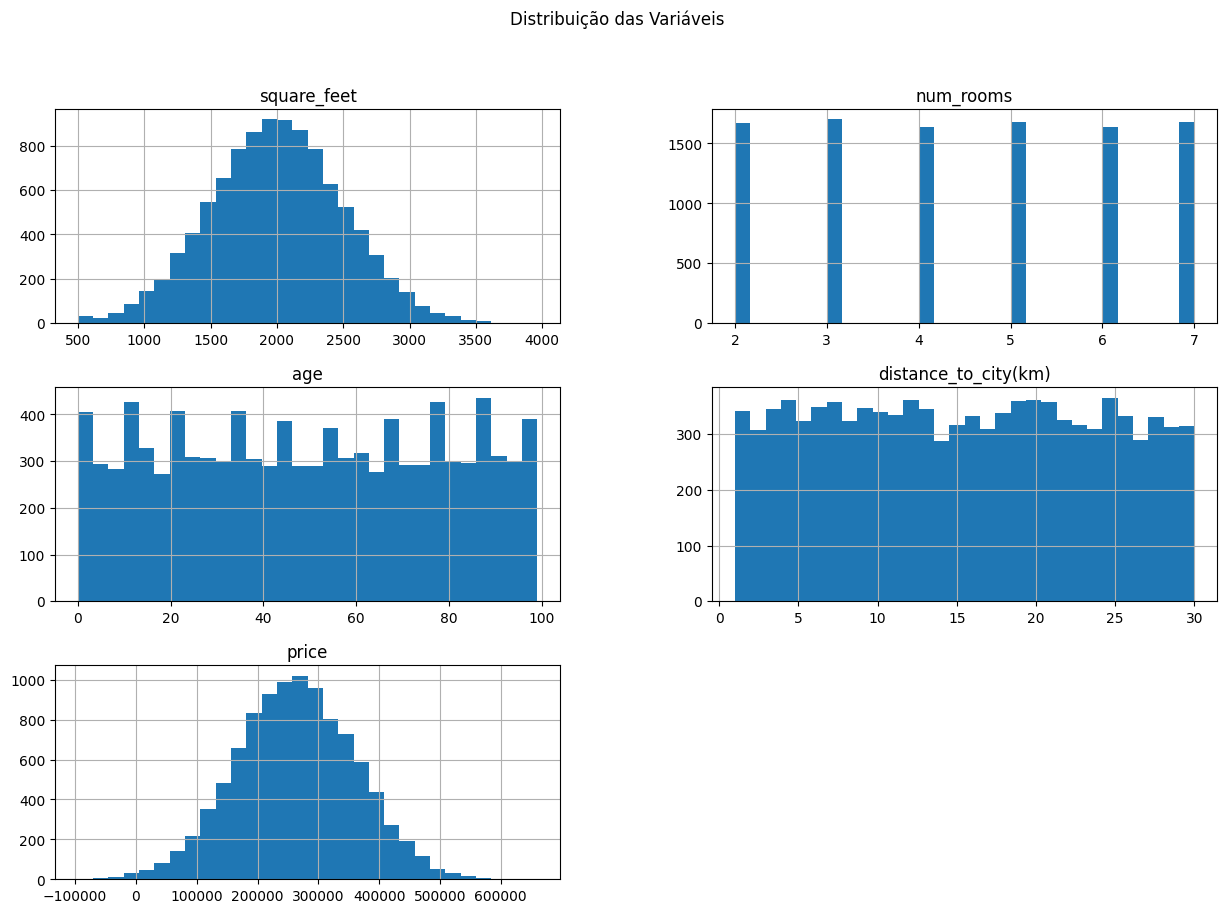

In [40]:
data.hist(bins=30, figsize=(15,10))
plt.suptitle('Distribuição das Variáveis')
plt.show()

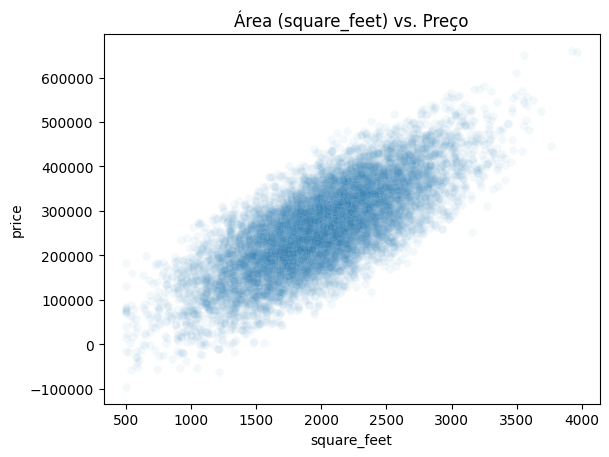

In [41]:
sns.scatterplot(x='square_feet', y='price', data=data, alpha=0.05)
plt.title('Área (square_feet) vs. Preço')
plt.show()

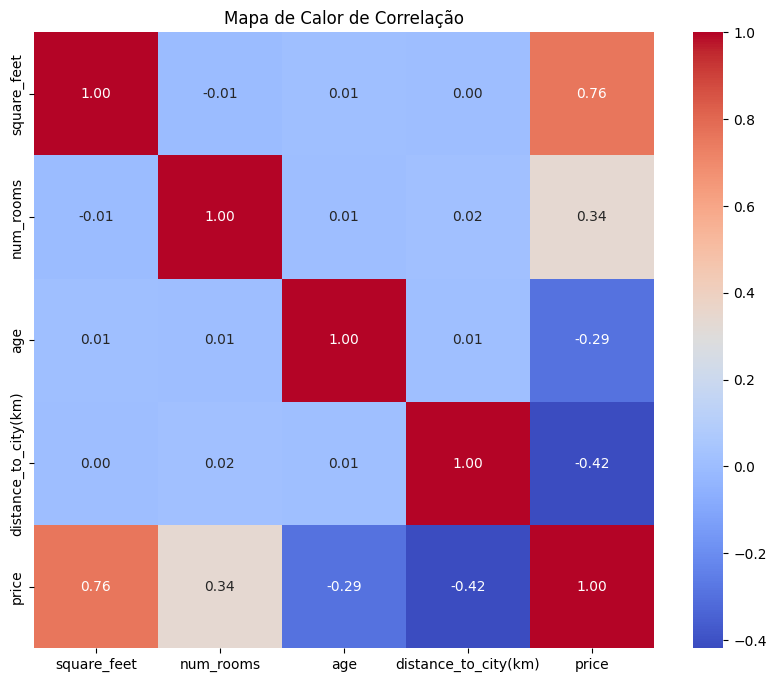

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlação')
plt.show()


In [43]:
y = data['price']
x = data.drop('price', axis=1)

In [44]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_treino, y_treino)

score = model.score(x_teste, y_teste)
score

0.9595923653784204

In [46]:
y_teste[700:705]

6857    198713.653873
1751    253618.683542
2262    414751.179487
5738    197899.995094
437     200056.136861
Name: price, dtype: float64

In [47]:
x_teste[700:705]

,square_feet,num_rooms,age,distance_to_city(km)
6857,1853.657271,7,58,23.641059
1751,2338.937660,4,84,22.486519
2262,2617.891096,7,21,17.698590
5738,1685.928130,7,71,29.236500
437,1309.949271,2,26,4.424661


In [48]:
previsao = model.predict(x_teste[700:705])
previsao

array([241287.02002704, 233602.54622515, 422885.98114259, 175011.20467325,
       187571.67639594])

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(x_teste)

mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
print("MAE:", mae)
print("MSE:", mse)


MAE: 15975.623343305044
MSE: 401314039.6470845
